DOWNLOADING NECESSARY LIBRARIES

DOWNLOADING NECESSARY LIBRARIES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import yfinance as yf

DEFINING BASIC VARIABLES

Selecting 5 high performance stocks from various sectors to reduce the correlaiton between them and a time period of 5 years to analyse the data

In [37]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 10000

stocks = ['HDFCBANK.NS','RELIANCE.NS','ITC.NS']

start_date = '2021-10-17'
end_date = '2023-10-17'

FETCHING STOCK DATA AND CREATING A DATAFRAME OUT OF THIS DATA

We chose closing price for genrality

In [38]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

# stock_prices.dropna(inplace = True)
stock_prices

,HDFCBANK.NS,RELIANCE.NS,ITC.NS
Date,,,
2021-10-18 00:00:00+05:30,1610.392090,1249.557007,233.877838
2021-10-19 00:00:00+05:30,1628.131958,1260.748291,219.090668
2021-10-20 00:00:00+05:30,1613.814697,1246.234131,219.669708
2021-10-21 00:00:00+05:30,1616.176758,1210.283325,217.977203
2021-10-22 00:00:00+05:30,1620.467163,1212.544678,210.761780
...,...,...,...
2023-10-10 00:00:00+05:30,1504.307983,1154.199951,423.647858
2023-10-11 00:00:00+05:30,1518.859253,1172.525024,427.318054
2023-10-12 00:00:00+05:30,1528.971191,1174.699951,429.653656


CALCULATING DAILY LOG RETURNS OF EACH STOCK

In [39]:
log_returns = np.log(stock_prices / stock_prices.shift(1))
log_returns.dropna(inplace = True)                                # First row will have Nan value
log_returns

,HDFCBANK.NS,RELIANCE.NS,ITC.NS
Date,,,
2021-10-19 00:00:00+05:30,0.010956,0.008916,-0.065313
2021-10-20 00:00:00+05:30,-0.008833,-0.011579,0.002639
2021-10-21 00:00:00+05:30,0.001463,-0.029272,-0.007735
2021-10-22 00:00:00+05:30,0.002651,0.001867,-0.033662
2021-10-25 00:00:00+05:30,-0.014231,-0.009791,-0.013617
...,...,...,...
2023-10-10 00:00:00+05:30,0.005656,0.004407,0.008928
2023-10-11 00:00:00+05:30,0.009627,0.015752,0.008626
2023-10-12 00:00:00+05:30,0.006636,0.001853,0.005451


CALCULATING ANNUAL RETURNS BY AVERAGING DAILY RETURNS AND SUMMING FOR ONE YEAR

In [40]:
yearly_returns = log_returns.mean()*NUM_TRADING_DAYS
yearly_returns

HDFCBANK.NS   -0.033108
RELIANCE.NS   -0.032610
ITC.NS         0.307639
dtype: float64

PLOTTING CORRELATION MATRIX TO REALISE THE RELATION BETWEEN STOCKS IS MINIMAL

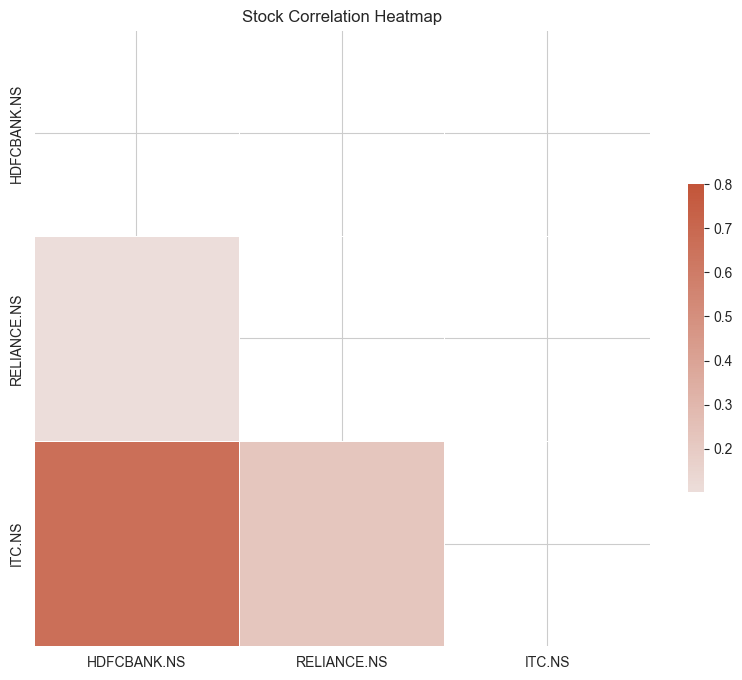

In [41]:
correlation_matrix = stock_prices.corr()



# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add a title
plt.title('Stock Correlation Heatmap')

# Show the plot
plt.show()

Explanation of the code below:

w = np.random.random(len(stocks)) - In this line, a random array of numbers is generated using the NumPy library. The length of this array is the same as the number of stocks in your portfolio. These random numbers represent the weights assigned to each stock in the portfolio.

w /= np.sum(w) - Here, the random weights are normalized. This means that the sum of all the weights in the portfolio will add up to 1. This ensures that the portfolio's assets are allocated properly, so you're not overinvesting in any single stock.

portfolio_weights.append(w) - The weights of the stocks in the current portfolio are stored in a list for later analysis.

port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by log_returns.mean()) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

portfolio_returns.append(port_return) - The estimated return for the current portfolio is stored in a list for later analysis.

port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w))) - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in port_risk.

portfolio_risks.append(port_risk) - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [42]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for _ in range(NUM_SIMULATIONS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7%

In [43]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the diffrent portfolios]

In [44]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": (portfolio_returns-risk_free_rate)/portfolio_risks})

portfolios

,Return,Risk,Sharpe
0,0.110348,0.168858,0.238947
1,0.100395,0.171930,0.176787
2,0.132136,0.167602,0.370732
3,0.131849,0.166476,0.371518
4,-0.012286,0.225873,-0.364300
...,...,...,...
9995,0.091976,0.166774,0.131770
9996,0.118214,0.162437,0.296818
9997,0.063730,0.172765,-0.036291
9998,0.004315,0.198878,-0.330279


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS
# *Plotting it*

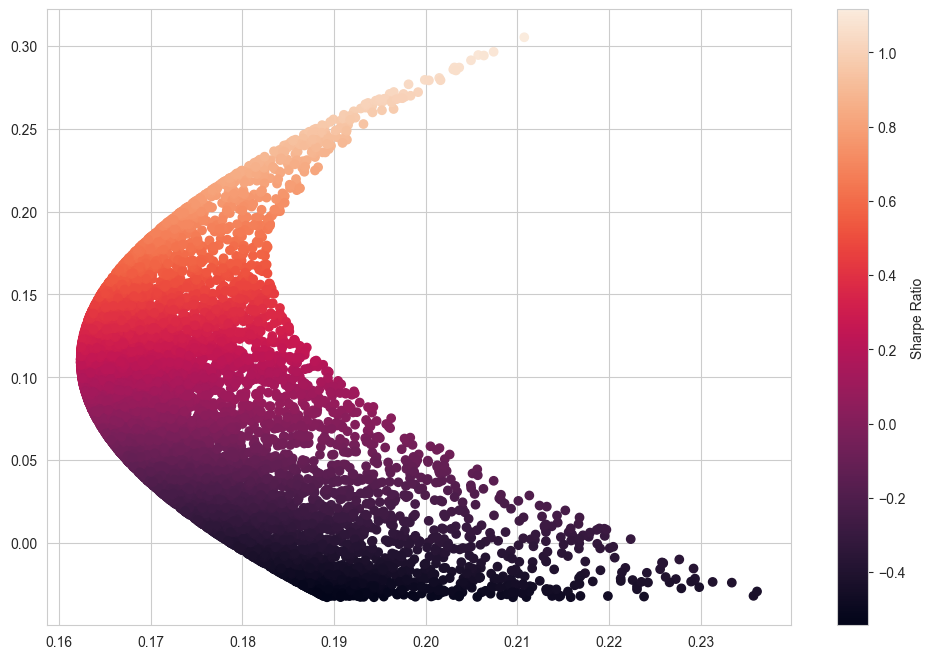

In [45]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"

First let's find out the Portfolio with the maximum Sharpe Ratio

In [46]:
sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

PRINTING VALUES

In [48]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  1.1161012695182226
Corresponding Return =   0.3052233508914469
Corresponding Risk =   0.21075448735309088


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [49]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

HDFCBANK.NS : 0.0028407737501798002
RELIANCE.NS : 0.004253564648240421
ITC.NS : 0.9929056616015798


Plotting the point of our portfolio with max sharpe

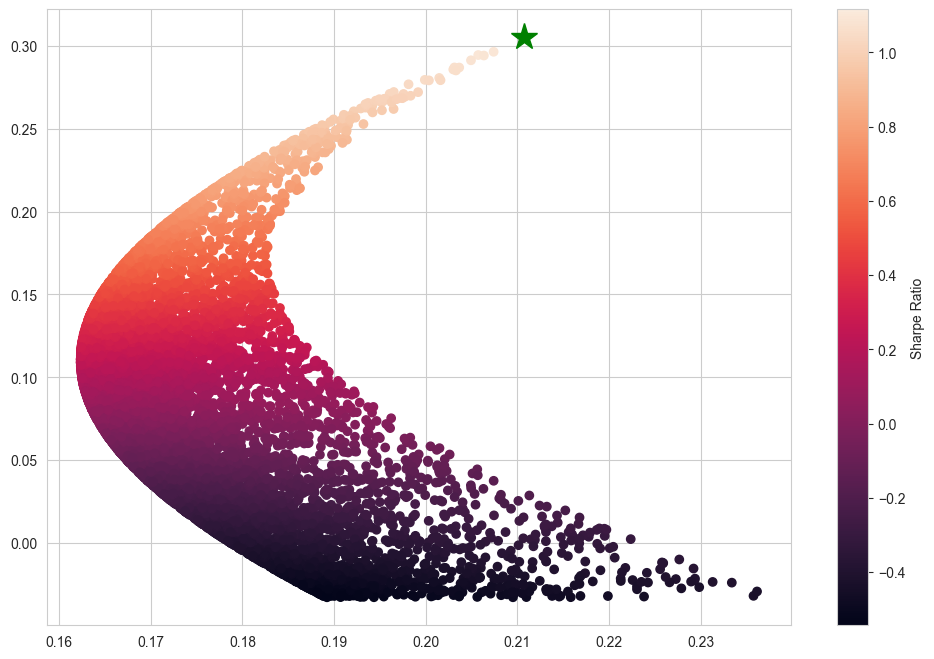

In [50]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [34]:
ind = 0
for i in range(len(portfolio_risks)):
    if(portfolio_risks[i]==np.amin(portfolio_risks)):
        ind = i
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])


Minimum Risk =  0.16235185738388733
Corresponding Return =   0.11065921334744568


In [35]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

HDFCBANK.NS : 0.37438169257111387
RELIANCE.NS : 0.20399748291490521
ITC.NS : 0.42162082451398103


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

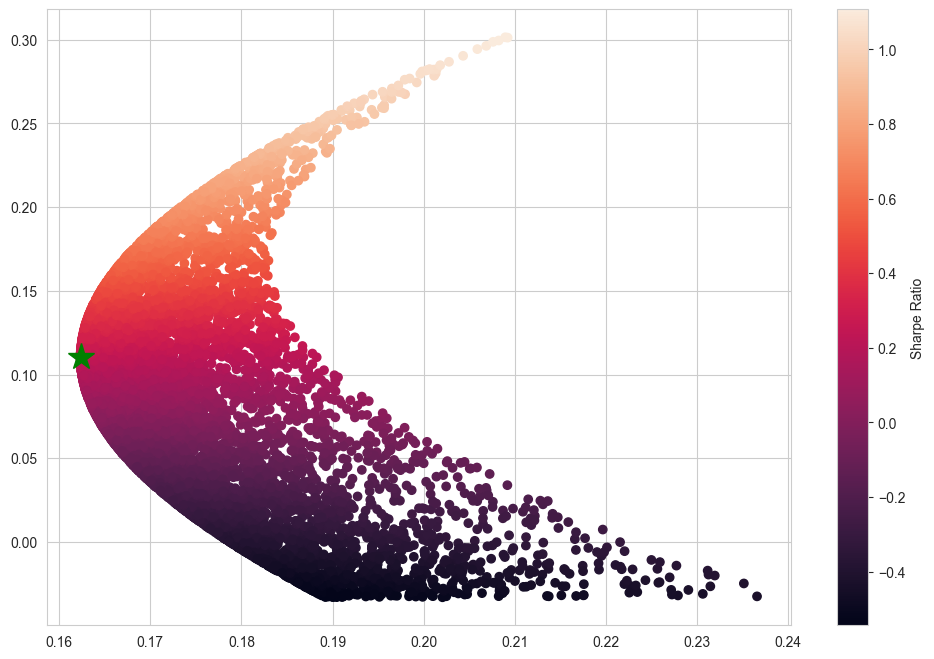

In [36]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = (portfolio_returns-risk_free_rate)/portfolio_risks, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk